# **Dataset Info**
## Observed mean daily precipiation rates averaged throughout a month.
## Grib file format found in the CMAP precipiation database on Cola server.
## *by Jake Campbell, Assignment 2.*

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

### Find path and open dataset as an xarray

In [2]:
file='/shared/obs/precip/cmap/monthly/precip.mon.mean.nc'

In [3]:
ds=xr.open_dataset(file)

In [4]:
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 491)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-11-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    version:        V1912
    history:        update 12/2019 V1912
    data_modified:  2019-12-12

### Set groups into months

In [5]:
ds_mon=ds.groupby('time.month').mean()
ds_mon

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 nan nan nan ... 0.45749998 0.45925003

### Plot final precipitation per month subpanel plots

Text(0.5, 0.98, 'CMAP Precipitation, Daily Averages by Month')

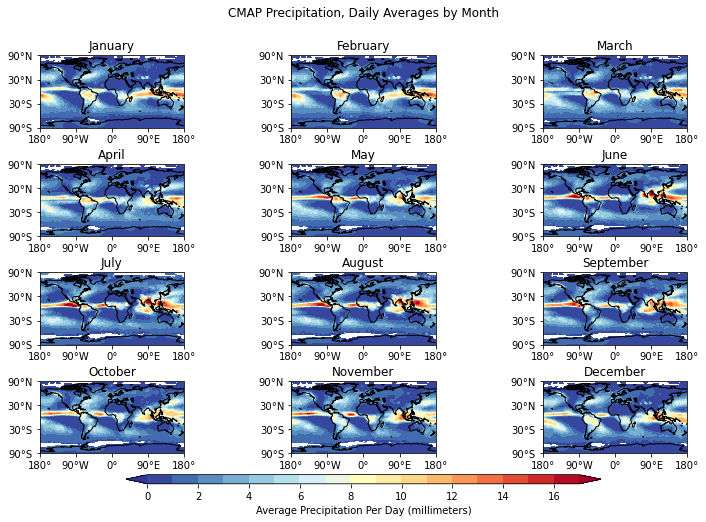

In [6]:
fig,axs=plt.subplots(nrows=4,ncols=3,subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11,8.5))
axs=axs.flatten()

clevs=np.arange(0,18,1)

for i, mon in enumerate(ds_mon['month']):
    data=ds['precip']
    data, longitude=add_cyclic_point(data,coord=ds['lon'])#Cyclic point insertion
    
    data=ds_mon['precip'].sel(month=mon)
    cs=axs[i].contourf(ds_mon['lon'],ds_mon['lat'],
                      data,clevs,
                      transform=ccrs.PlateCarree(),
                      cmap='RdYlBu_r',extend='both') 
    
    #Longitude Labels
    axs[i].set_xticks(np.arange(-180,181,90),crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    
     #Latitude Labels
    axs[i].set_yticks(np.arange(-90,91,60),crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    
    axs[i].coastlines()
    axs[i].set_title(mon.values)

#Monthly tags for the subplots (instead of integrals)
axs[0].set_title("January")
axs[1].set_title("February")
axs[2].set_title("March")
axs[3].set_title("April")
axs[4].set_title("May")
axs[5].set_title("June")
axs[6].set_title("July")
axs[7].set_title("August")
axs[8].set_title("September")
axs[9].set_title("October")
axs[10].set_title("November")
axs[11].set_title("December")

#Make room for colorbar
fig.subplots_adjust(bottom=0.25,top=0.9,left=0.05,right=0.95,
                  wspace=0.2,hspace=0.5)

cbar_ax=fig.add_axes([0.2,0.2,0.6,0.015])
cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Average Precipitation Per Day (millimeters)')

plt.suptitle('CMAP Precipitation, Daily Averages by Month')